In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('C:\\Users\\gamak\\Documents\\Papers\\Stars\\xstars_r98_b15_lkh10_GAIA.gz')

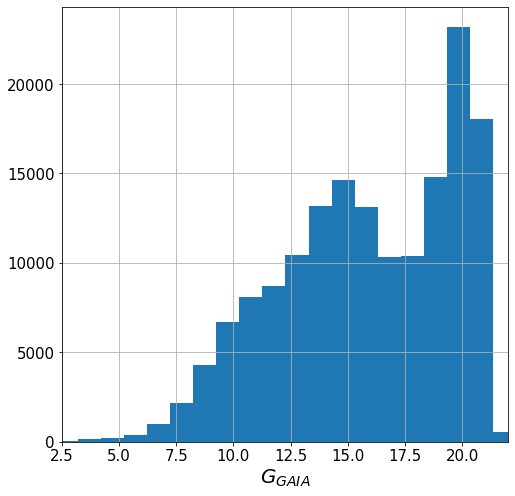

In [11]:
fig = plt.figure(figsize=(8,8))
data['phot_g_mean_mag'].hist(bins = 20)
plt.xlim(2.5,22,5)
plt.xlabel('$G_{GAIA}$', size=20)
plt.tick_params(labelsize = 15)
plt.savefig('C:\\Users\\gamak\\Documents\\Papers\\Stars\\hist_photG.jpg')

In [215]:
# flux = sum([417.5, 632, 363.1, 217.7, 112.6, 31.47])*5000*10**(-11)
flux = 362.3 * 4548*10**(-11)
par = data['parallax']
G = data['phot_g_mean_mag']
MG = pd.Series(range(data.shape[0]),name='MG') 
flux_bol = pd.Series(range(data.shape[0]),name = 'Fbol') 
bp_rp = pd.Series(range(data.shape[0]), name = 'BP-RP')
XOratio = pd.Series(range(data.shape[0]), name = 'Log(Fx/Fo)')
ML = data['ML_FLUX_0']                  
bp = data['phot_bp_mean_mag']
rp = data['phot_rp_mean_mag']

In [216]:
for j in range(data.shape[0]):
#     if j%10000 == 0:
#         print(j)
    if par.iloc[j] > 0 and G.iloc[j] != None:
        MG.iloc[j] = G.iloc[j]  + 5 + 5*(math.log10(par.iloc[j])-3)
        flux_bol.iloc[j] = 10**(-G.iloc[j]/2.5)*flux
    else:
        MG.iloc[j] = None
        flux_bol.iloc[j] = None
    if bp[j] != None and rp[j] != None:
        bp_rp.iloc[j] =  bp.iloc[j] - rp.iloc[j] 
    else:
        bp_rp.iloc[j] = None
    if flux_bol[j] > 0:
        XOratio.iloc[j] = math.log10(ML.iloc[j]/flux_bol.iloc[j])
    else:
        XOratio.iloc[j] = None 

In [217]:
data1.to_csv('C://Users//gamak//Documents//Papers//Stars/xstars_r98_b15_lkh10_GAIA_extended.gz')

In [233]:
i = data['parallax'] >= 10

(-8.0, 1.0)

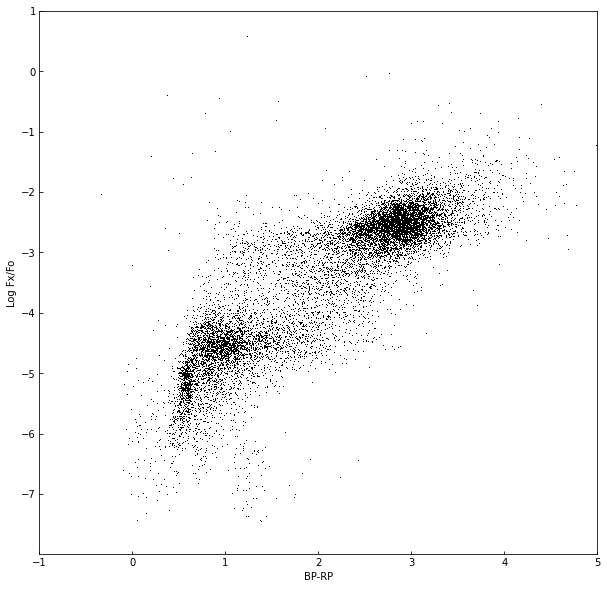

In [234]:
fig = plt.figure(figsize=(10,10))
plt.plot(bp_rp[i],XOratio[i],',k')
plt.xlabel('BP-RP')
plt.ylabel('Log Fx/Fo')
plt.xlim(-1,5)
plt.savefig('C:\\Users\\gamak\\Documents\\Papers\\Stars\\LogXOratio_100pc.pdf')
plt.tick_params(direction = 'in')
plt.yticks(np.arange(-7, 2, 1.0))
plt.ylim(-8,1)

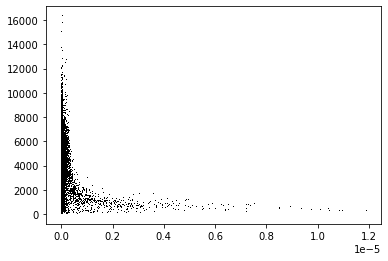

In [246]:
plt.plot(data1['Fbol'],data1['phot_g_mean_flux_over_error'],',k')

In [245]:
data1.columns

Index(['hpidx', 'srcname_fin', 'RA_fin', 'DEC_fin', 'srcname', 'RA', 'DEC',
       'RADEC_ERR', 'DET_LIKE_0', 'ML_FLUX_0', 'ML_FLUX_ERR_0', 'ML_CTS_0',
       'ML_CTS_ERR_0', 'ML_BKG_0', 'ML_RATE_0', 'ML_RATE_ERR_0', 'EXT',
       'EXT_LIKE', 'EXT_ERR', 'ML_EXP_1', 'tilenum', 'ID_SRC', 'TSTART',
       'TSTOP', 'ID_CLUSTER', 'DIST_NN', 'SRCDENS', 'NH', 'RA_corr',
       'DEC_corr', 'astro_indx', 'astro_nx', 'astro_mdra', 'astro_mddec',
       'astro_fit_nx', 'astro_fit_sigma', 'astro_fit_ro_opt', 'astro_flag',
       'GLON', 'GLAT', 'ELON', 'ELAT', 'pos_sigma_2d', 'pos_r68', 'pos_r95',
       'pos_r98', 'flux_05-20', 'pos_r98_orig', 'sep_gaia', 'gaia', 'ra_match',
       'dec_match', 'ra_gaia', 'dec_gaia', 'source_id', 'phot_g_mean_mag',
       'phot_g_mean_flux_over_error', 'phot_bp_mean_mag',
       'phot_bp_mean_flux_over_error', 'phot_rp_mean_mag',
       'phot_rp_mean_flux_over_error', 'parallax', 'parallax_error', 'prlx_sn',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'p

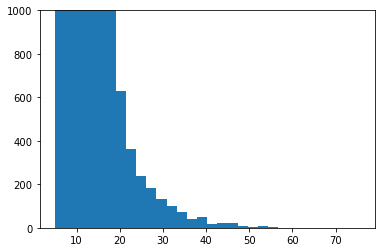

In [242]:
plt.hist(data1['pos_r98'],bins = 30)
plt.ylim(0,1000)
plt.savefig('C:\\Users\\gamak\\Documents\\Papers\\Stars\\hist1.pdf')

C:\Users\gamak\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gamak\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


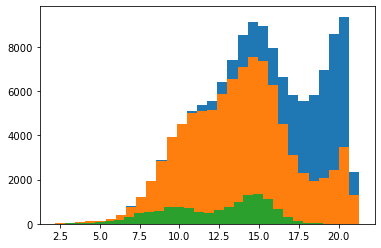

In [238]:
# data['parallax_error'][i].hist()
i = data1['parallax'] >= .1
k = data1['parallax'] >= 1
j = data1['parallax'] >= 10

plt.hist(data1['phot_g_mean_mag'][i],bins = 30)
plt.hist(data1['phot_g_mean_mag'][k],bins = 30)
plt.hist(data1['phot_g_mean_mag'][j],bins = 30)
#plt.xlim(-.1,1.0)
plt.savefig('C:\\Users\\gamak\\Documents\\Papers\\Stars\\hist.pdf')

In [103]:
bp_rp = data['phot_bp_mean_mag'][i] - data['phot_rp_mean_mag'][i]
par = data['parallax'][i]
G = data['phot_g_mean_mag'][i]
# ff = (dist**2)/100
MG = G
for j in range(par.shape[0]):
    MG.iloc[j] = G.iloc[j]  + 5 + 5*(math.log10(par.iloc[j])-3)

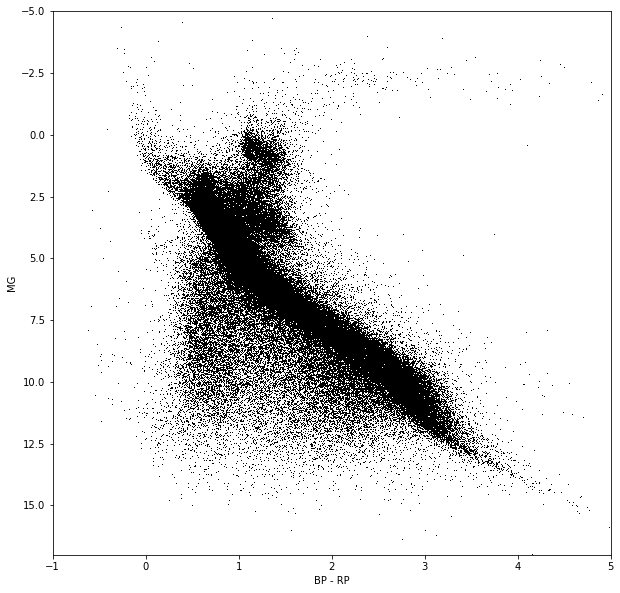

In [95]:
fig = plt.figure(figsize=(10,10))
plt.plot(bp_rp,MG, ',k')
plt.ylim(17,-5)
plt.xlim(-1,5)
plt.xlabel('BP - RP')
plt.ylabel('MG')
plt.savefig('C:\\Users\\gamak\\Documents\\Papers\\Stars\\MS_prelim_10kpc.pdf')

In [104]:
bp_rp.shape[0]

93298

In [80]:
data.head(3)

,hpidx,srcname_fin,RA_fin,DEC_fin,srcname,RA,DEC,RADEC_ERR,DET_LIKE_0,ML_FLUX_0,...,parallax,parallax_error,prlx_sn,pmra,pmra_error,pmdec,pmdec_error,pmra_sn,pmdec_sn,gaia_star
0,1998053,SRGe J030036.7+002309,45.153072,0.385808,SRGe J030036.9+002309,45.153635,0.385797,3.013409,35.211754,3.893823e-14,...,5.473906,0.019139,286.009160,23.342820,0.018675,-2.419787,0.016326,1249.962949,148.215343,True
1,2012323,SRGe J030027.1+002248,45.112785,0.379869,SRGe J030027.2+002247,45.113347,0.379859,5.948799,10.992605,1.561225e-14,...,0.027400,0.077849,0.351968,-0.065944,0.096324,-1.860642,0.069772,0.684604,26.667624,True
2,8997111,SRGe J025829.0+002616,44.620748,0.437857,SRGe J025829.1+002616,44.621296,0.437856,5.789958,10.791742,1.586522e-14,...,2.471865,0.023015,107.401350,1.153967,0.028419,2.823731,0.021371,40.605557,132.131048,True
